In [2]:
%load_ext autoreload
%autoreload 2
%env WANDB_SILENT=true

from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import quantstats as qs
import os
import logging
import json

logger = logging.getLogger("wandb")
logger.setLevel(logging.ERROR)
qs.extend_pandas()
plt.style.use("seaborn-whitegrid")
pd.set_option('display.max_rows', 200)

if "freqtrade" not in os.listdir():
    os.chdir("..")
    import nest_asyncio
    nest_asyncio.apply()

PATH_MOUNT = Path.cwd().parent / "mount"
print("Working Directory:", os.getcwd())

# Freqtrade Imports
from freqtrade.optimize.optimize_reports import text_table_add_metrics
from freqtrade.nbtools.preset import Preset
from freqtrade.nbtools import plotting

env: WANDB_SILENT=true
Working Directory: C:\CS\Python\crypto-collection\freqtrade\superft


In [19]:
PATH_LOCAL_PRESET = PATH_MOUNT / "presets" / "normalizer"
PATH_LOCAL_DATADIR = PATH_MOUNT / "data" / "binance"
TIMERANGE = "20210501-20210801"

# Start Backtesting Logic
preset_local, strategy_code = Preset.from_local(PATH_LOCAL_PRESET)
preset_local.datadir = PATH_LOCAL_DATADIR
preset_local.timerange = TIMERANGE

print("Backtesting...")
stats, summary = preset_local.backtest_by_default_strategy_code()
trades = pd.DataFrame(stats["strategy"]["NotebookStrategy"]["trades"])
print("[GOOD NEWS] Backtest done! Data is ready to be analyzed.")

Backtesting...
You are backtesting a local preset `C:\CS\Python\crypto-collection\freqtrade\mount\presets\normalizer`
Keep in mind that this will update backtest results (such as metadata.json, exports)
But if you modified the strategy from notebook, it will not update the local strategy file.
[GOOD NEWS] Backtest done! Data is ready to be analyzed.


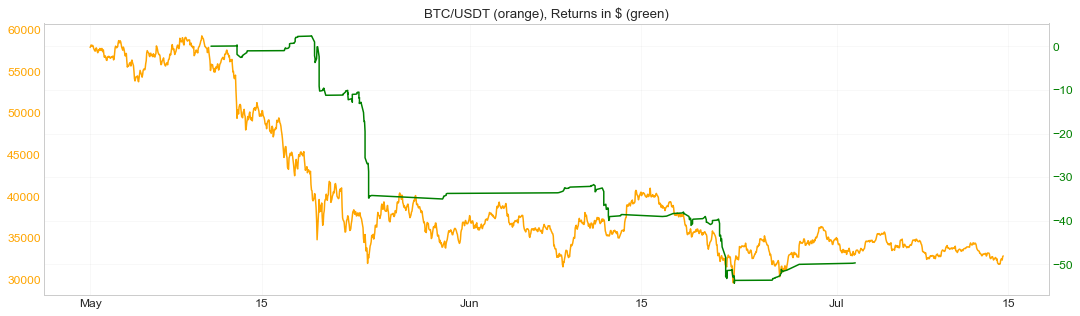

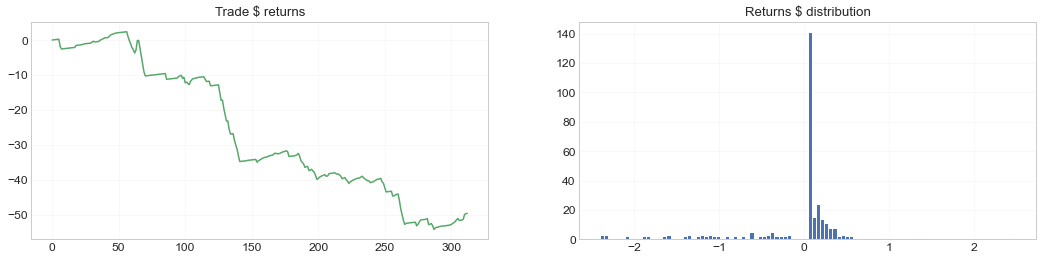

Portfolio Summary
------------------------------
Min Balance          : -54.23
Max Balance          : 2.41
End Balance          : -49.63
------------------------------
Trades               : 313
Avg. Profit %        : -1.06%
Avg. Profit $        : -0.16
Biggest Profit $     : 2.70
Biggest Loss $       : -2.40
------------------------------


In [20]:
plotting.plot_profits(
    trades,
    start = "2021-05-01",
    end = "2021-08-01",
    path_mount = PATH_MOUNT
)

In [21]:
# Running this cell will print backtest results
results = stats["strategy"]["NotebookStrategy"]

# Results per pair
results_per_pair = pd.DataFrame(results["results_per_pair"])
results_per_pair_df = results_per_pair.set_index("key").drop(columns=["profit_mean", "profit_total"])
results_per_pair_df = results_per_pair_df.sort_values(by=["profit_total_abs"], ascending=False)
results_per_pair_df.round(2)

# Sell reason stats
sells = pd.DataFrame(results['sell_reason_summary'])
sells = sells.drop(columns=["profit_mean", "profit_total"]).set_index("sell_reason")

# Left open trades
left_open_trades = pd.DataFrame(results['left_open_trades'])
left_open_trades = left_open_trades.drop(columns=["profit_mean", "profit_total"]).set_index("key")

# Summary metrics
metrics = text_table_add_metrics(results)

# Advanced metrics
with (preset_local.path_local_preset / "metadata.json").open("r") as fs:
    advanced_metrics = json.load(fs)
    advanced_metrics["profit_mean"] = advanced_metrics["profit_mean"] * 100
    advanced_metrics["profit_median"] = advanced_metrics["profit_median"] * 100
    advanced_metrics["profit_total"] = advanced_metrics["profit_total"] * 100

for key, value in advanced_metrics.items():
    if isinstance(value, float):
        advanced_metrics[key] =  round(value, 3)
    advanced_metrics[key] = [advanced_metrics[key]]
    
advanced_metrics_df = pd.DataFrame(advanced_metrics)
    
print("Results Per Pair")
display(results_per_pair_df.round(2))
print("Sell Reasons")
display(sells.round(2))
print("Left Open Trades")
display(left_open_trades.round(2))
print("Freqtrade Summary Metrics")
print("=" * 48 + "\n" + metrics + "\n" + "=" * 48)
print("Advanced Metrics")
print("Preset Name:", advanced_metrics_df["preset_name"][0])
display(advanced_metrics_df.drop(columns=["preset_name", "pairlist"]).T)

Results Per Pair


,trades,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,,
KSM/USDT,6,1.68,0.10,10.06,1.51,0.15,2:30:00,5,0,1
AAVE/USDT,6,1.30,0.08,7.82,1.17,0.12,1:50:00,6,0,0
DCR/USDT,5,1.30,0.07,6.52,0.98,0.10,2:00:00,5,0,0
ADA/USDT,4,1.61,0.06,6.42,0.96,0.10,1:15:00,4,0,0
ETH/USDT,6,0.84,0.05,5.05,0.76,0.08,1:40:00,6,0,0
NANO/USDT,9,0.51,0.05,4.59,0.69,0.07,0:47:00,9,0,0
ONE/USDT,7,0.65,0.05,4.57,0.69,0.07,0:34:00,7,0,0
UNI/USDT,6,0.75,0.05,4.50,0.68,0.07,1:40:00,5,0,1
NEAR/USDT,6,0.74,0.04,4.45,0.67,0.07,1:10:00,6,0,0


Sell Reasons


,trades,wins,draws,losses,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct
sell_reason,,,,,,,,,
trailing_stop_loss,312,235,0,77,-1.12,-3.49,-348.55,-52.33,-58.09
roi,1,1,0,0,17.98,0.18,17.98,2.70,3.00


Left Open Trades


,trades,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,,
TOTAL,0,0.0,0.0,0.0,0.0,0.0,0:00,0,0,0


Freqtrade Summary Metrics
| Metric                 | Value               |
|------------------------+---------------------|
| Backtesting from       | 2021-05-01 00:00:00 |
| Backtesting to         | 2021-07-03 14:00:00 |
| Max open trades        | 6                   |
|                        |                     |
| Total/Daily Avg Trades | 313 / 4.97          |
| Starting balance       | 1000.000 USDT       |
| Final balance          | 950.366 USDT        |
| Absolute profit        | -49.634 USDT        |
| Total profit %         | -4.96%              |
| Avg. stake amount      | 15.000 USDT         |
| Total trade volume     | 4695.000 USDT       |
|                        |                     |
| Best Pair              | KSM/USDT 10.06%     |
| Worst Pair             | LUNA/USDT -37.59%   |
| Best trade             | DOGE/USDT 17.98%    |
| Worst trade            | DOGE/USDT -16.0%    |
| Best day               | 2.610 USDT          |
| Worst day              | -22.376 USDT    

,0
backtest_date,2021-07-14 21:59:10
leverage,1
direction,long
is_hedging,False
num_pairs,62
data_source,binance
win_rate,0.754
avg_profit_winners_abs,0.147
avg_profit_losers_abs,-1.096
sum_profit_winners_abs,34.746
